relplot

Функция sns.relplot() библиотеки seaborn является универсальной функцией для визуализации отношений между переменными и используется для создания различных типов реляционных графиков, таких как линейные графики (lineplot) и точечные графики (scatterplot).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)

sns.relplot()

1) data: DataFrame, массив с данными;
2) x, y: имена переменных, которые будут отображены на осях X и Y, соответственно;
3) hue: переменная для группировки данных по цвету;
4) size: переменная, значение которой будет использоваться для изменения размера точек;
5) style: переменная, значение которой будет использоваться для изменения стиля точек или линий;
6) units: имя переменной, которая определяет семантические подгруппы для раздельного отображения каждой точки;
7) weights: имя переменной, которая определяет веса точек (используется при построении регрессии или других статистических моделей);
8) row: имя переменной, которая определяет, как данные будут разбиты на строки при использовании нескольких подграфиков;
9) col: имя переменной, которая определяет, как данные будут разбиты на столбцы при использовании нескольких подграфиков;
10) col_wrap: количество столбцов в сетке подграфиков до переноса на новую строку;
11) row_order: порядок, в котором строки должны быть отображены;
12) col_order: порядок, в котором столбцы должны быть отображены;
13) palette: параметр, определяющий цветовую палитру для переменной hue. Может быть именем палитры, списком цветов или словарем, отображающим уровни переменной в цвета;
14) hue_order: порядок отображения уровней переменной hue;
15) hue_norm: нормализация для цветовой палитры;
16) sizes: значения для переменной size, которые будут отображены в виде размеров маркеров. Может быть словарем или списком значений;
17) size_order: порядок отображения уровней переменной size;
18) size_norm: нормализация для размеров маркеров;
19) markers: маркеры для переменной style. Может быть списком или словарем;
20) dashes: определяет типы линий (например, пунктирные) для переменной style;
21) style_order: определяет порядок отображения уровней переменной style;
22) legend: управляет отображением легенды ('auto', 'brief', 'full', или False);
23) kind: тип графика. Может быть 'scatter' (по умолчанию) для диаграммы рассеяния или 'line' для линейного графика;
24) height: управляет высотой каждого подграфика (по умолчанию height=5);
25) aspect: соотношение ширины и высоты каждого подграфика (по умолчанию aspect=1).

In [4]:
taxis = sns.load_dataset('taxis').dropna()

taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
df = taxis[taxis['pickup_borough'] == 'Queens']
df.loc[:, 'pickup_day_name'] = df['pickup'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day_name'] = pd.Categorical(df['pickup_day_name'], categories=day_order, ordered=True)
df.head()

/var/folders/k_/76sd045j1vs19_1p5_lf75p80000gn/T/ipykernel_22598/3193889705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'pickup_day_name'] = df['pickup'].dt.day_name()
/var/folders/k_/76sd045j1vs19_1p5_lf75p80000gn/T/ipykernel_22598/3193889705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day_name'] = pd.Categorical(df['pickup_day_name'], categories=day_order, ordered=True)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day_name
10,2019-03-16 10:02:25,2019-03-16 10:22:29,1,3.90,17.0,0.00,0.00,17.80,yellow,cash,LaGuardia Airport,Astoria,Queens,Queens,Saturday
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.5,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan,Thursday
43,2019-03-27 19:39:16,2019-03-27 20:00:26,1,9.50,28.0,0.00,5.76,35.06,yellow,cash,LaGuardia Airport,Washington Heights South,Queens,Manhattan,Wednesday
53,2019-03-20 18:49:24,2019-03-20 19:12:40,1,13.45,36.0,0.00,0.00,37.80,yellow,cash,JFK Airport,Sunnyside,Queens,Queens,Wednesday
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,52.0,0.00,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan,Tuesday


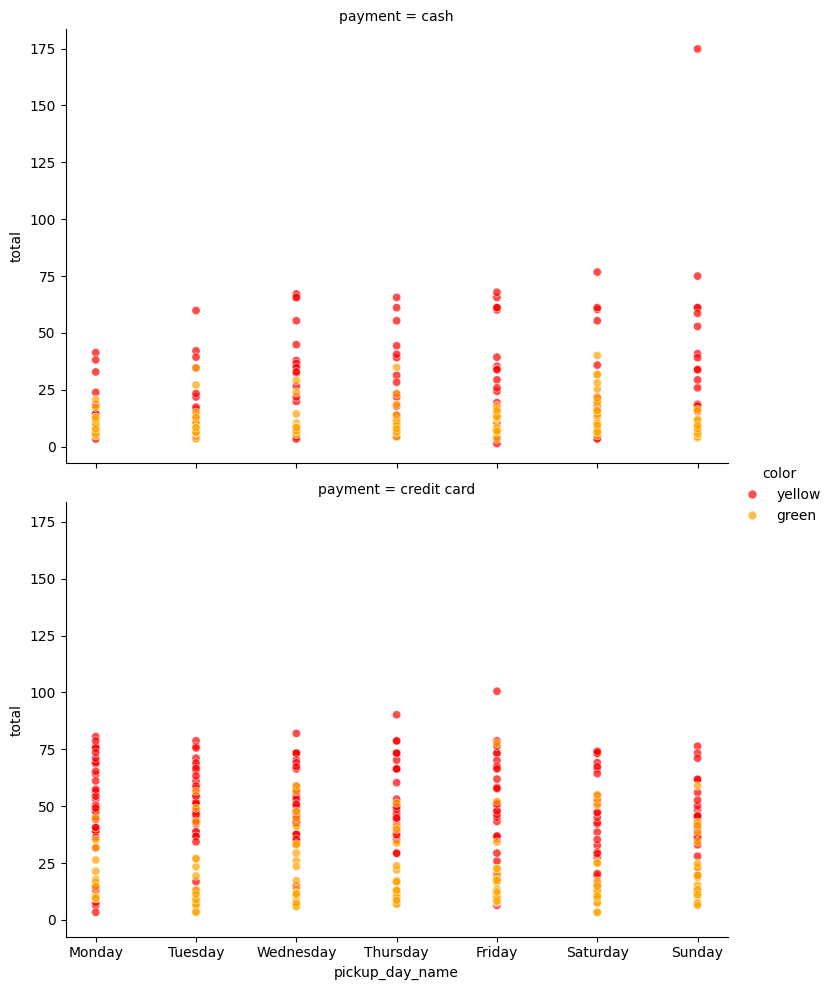

In [8]:
g = sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.5,
            hue='color',
            palette=['r', 'orange'],
            alpha=0.7,
            row='payment')
plt.show()

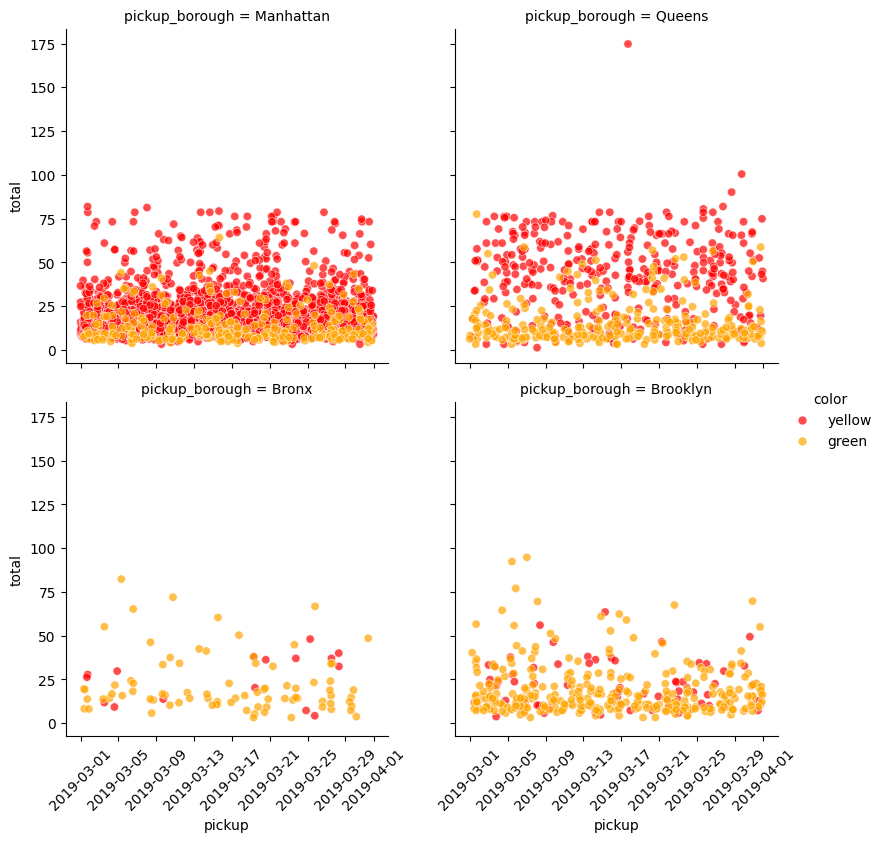

In [10]:
g = sns.relplot(data=taxis, x='pickup', y='total',
                height=4,
                hue='color',
                palette=['r', 'orange'],
                alpha = 0.7,
                col='pickup_borough',
                col_wrap=2)

for ax in g.axes.flat: 
    for label in ax.get_xticklabels(): 
        label.set_rotation(45)

plt.show()